# Xiaotang Chai--xiaotangchai--4691635851

In [6]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt 

In [7]:
data=pd.read_excel('/Users/chaixiaotang/Documents/GitHub/homework-2-xiaotangchai/data/CCPP/Folds5x2_pp.xlsx')

In [8]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Question B

In [9]:
data.shape

(9568, 5)

In [10]:
print('There are ',len(data),'rows and',len(data.columns),'columns in the dataset')

There are  9568 rows and 5 columns in the dataset


In [11]:
#According to the read me, features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.


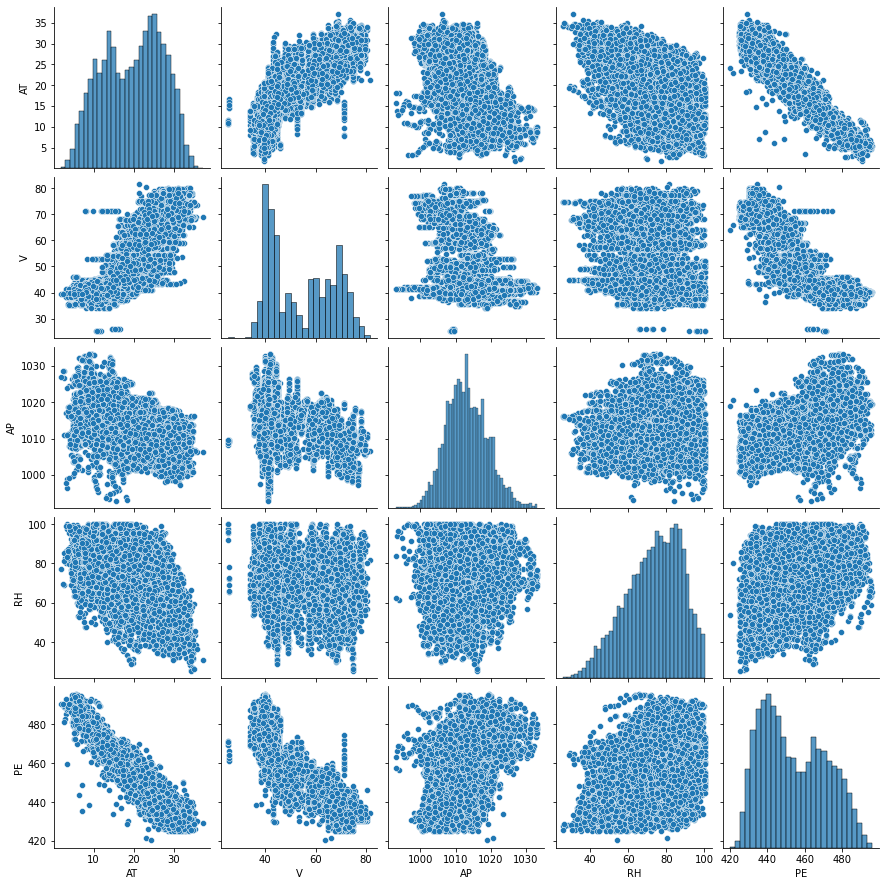

In [12]:
sns.pairplot(data)

In [13]:
# from the plot, we can see that PE and AT, PE and V have negative correlation. 
# AP and PE, RH and PE have positive correlation.

In [14]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [15]:
data_describe=data.describe()
data_describe.loc['interquartile ranges']=data_describe.iloc[6].subtract(data_describe.iloc[4])

In [16]:
data_describe

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
interquartile ranges,12.210000,24.800000,8.160000,21.502500,28.680000


# Question C

In [17]:
coef=[]

In [18]:
X_AT=data['AT']
y=data['PE']

Text(0.5, 1.0, 'AT boxplot')

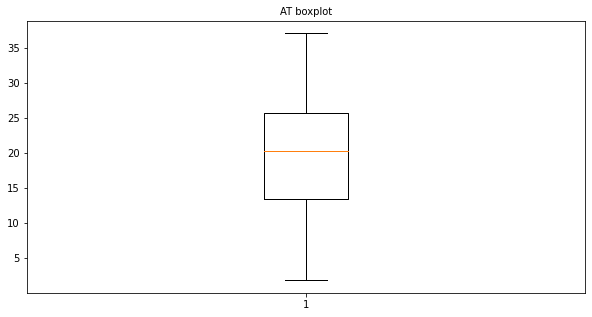

In [19]:
plt.figure(figsize=(10,5))
plt.boxplot(X_AT)
plt.title('AT boxplot',fontsize=10)

In [20]:
# from the boxplot, there are no outliers.

In [21]:
X_AT_sm = sm.add_constant(X_AT)
lr = sm.OLS(y, X_AT_sm).fit()
print(lr.params)
print(lr.summary())

const    497.03412
AT        -2.17132
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:31   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [22]:
# P value <0.05, so it is significant.

In [23]:
coef.append(lr.params['AT'])

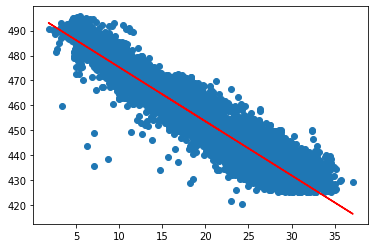

In [24]:
plt.scatter(X_AT, y)
plt.plot(X_AT, 497.034-2.171*X_AT, 'r')
plt.show()

In [25]:
X_V=data['V']

Text(0.5, 1.0, 'V boxplot')

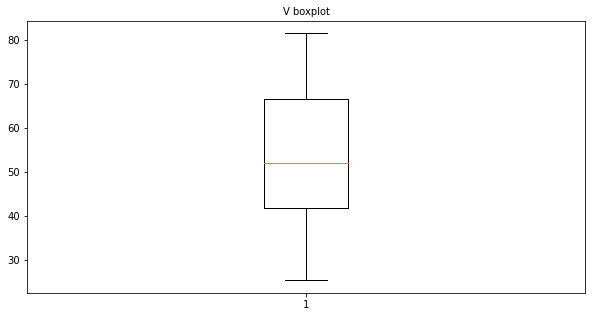

In [26]:
plt.figure(figsize=(10,5))
plt.boxplot(X_V)
plt.title('V boxplot',fontsize=10)

In [27]:
# from the boxplot, there are no outliers.

In [28]:
X_V_smv = sm.add_constant(X_V)
lr_v = sm.OLS(y, X_V_smv).fit()
print(lr_v.params)
print(lr_v.summary())

const    517.801526
V         -1.168135
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:31   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [29]:
# P value <0.05, so it is significant.

In [30]:
coef.append(lr_v.params['V'])

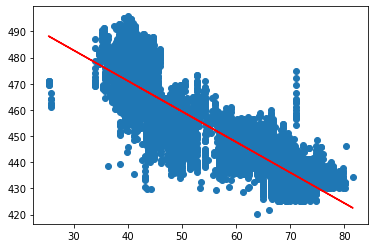

In [31]:
plt.scatter(X_V, y)
plt.plot(X_V, 517.802 -1.168*X_V, 'r')
plt.show()

In [32]:
X_AP=data['AP']

Text(0.5, 1.0, 'AP boxplot')

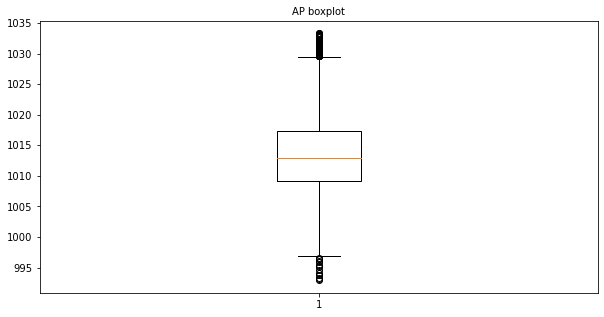

In [33]:
plt.figure(figsize=(10,5))
plt.boxplot(X_AP)
plt.title('AP boxplot',fontsize=10)

In [34]:
#there are some outliers in this regression

In [35]:
X_AP_sm = sm.add_constant(X_AP)
lr_AP = sm.OLS(y, X_AP_sm).fit()
print(lr_AP.params)
print(lr_AP.summary())

const   -1055.260989
AP          1.489872
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:31   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [36]:
# P value <0.05, so it is significant.

In [37]:
coef.append(lr_AP.params['AP'])

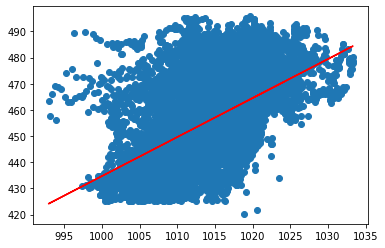

In [38]:
plt.scatter(X_AP, y)
plt.plot(X_AP, -1055.261+1.490*X_AP, 'r')
plt.show()

In [39]:
X_RH=data['RH']

Text(0.5, 1.0, 'RH boxplot')

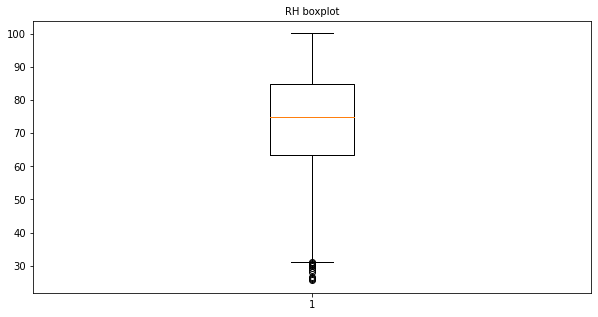

In [40]:
plt.figure(figsize=(10,5))
plt.boxplot(X_RH)
plt.title('RH boxplot',fontsize=10)

In [41]:
#there are some outliers in the regression

In [42]:
X_RH_sm= sm.add_constant(X_RH)
lr_RH = sm.OLS(y, X_RH_sm).fit()
print(lr_RH.params)
print(lr_RH.summary())

const    420.961766
RH         0.455650
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:31   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [43]:
# P value <0.05, so it is significant.

In [44]:
coef.append(lr_RH.params['RH'])

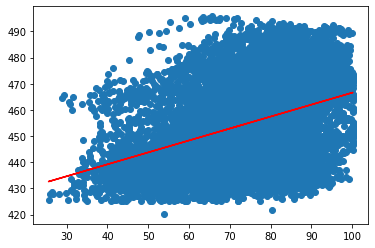

In [45]:
plt.scatter(X_RH, y)
plt.plot(X_RH, 420.962+0.456*X_RH, 'r')
plt.show()

# Question D


In [46]:
X_d=data.drop('PE',axis=1)
y=data['PE']

In [47]:
X_d_sm= sm.add_constant(X_d)
lr_d = sm.OLS(y, X_d_sm).fit()
print(lr_d.params)
print(lr_d.summary())

const    454.609274
AT        -1.977513
V         -0.233916
AP         0.062083
RH        -0.158054
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:32   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [48]:
#p value < 0.05, so we reject H0

In [49]:
coef_multi=[lr_d.params['AT'],lr_d.params['V'],lr_d.params['AP'],lr_d.params['RH']]

In [50]:
coef_multi

[-1.9775131066353926,
 -0.23391642258249906,
 0.06208294378085444,
 -0.1580541029164157]

# Question E

<AxesSubplot:>

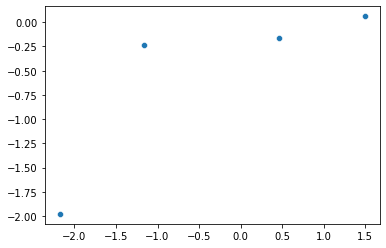

In [51]:
sns.scatterplot(x=coef,y=coef_multi)

# Question F

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
poly = PolynomialFeatures(3)

In [54]:
x_at=X_AT.values.reshape(-1,1)

In [55]:
poly_AT=poly.fit_transform(x_at)

In [56]:
X_AT_sm = sm.add_constant(poly_AT)
lr_AT_f = sm.OLS(y, X_AT_sm).fit()

In [57]:
lr_AT_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:32   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# p value <0.05, AT and PE has non-linear regression

In [59]:
poly = PolynomialFeatures(3)
x_v=X_V.values.reshape(-1,1)
poly_V=poly.fit_transform(x_v)
X_V_sm = sm.add_constant(poly_V)
lr_V_f = sm.OLS(y, X_V_sm).fit()
lr_V_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:32   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
x1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
x2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
x3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# X2 p value >0.05, V^3 and PE has non-linear regression

In [61]:
poly = PolynomialFeatures(3)
x_ap=X_AP.values.reshape(-1,1)
poly_AP=poly.fit_transform(x_ap)
X_AP_sm = sm.add_constant(poly_AP)
lr_AP_f = sm.OLS(y, X_AP_sm).fit()
lr_AP_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:32   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
x1            25.2556      3.001      8.415      0.000      19.372      31.139
x2            -0.0500      0.006     -8.439      0.000      -0.062      -0.038
x3          2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# p value <0.05, AP and PE has non-linear regression

In [63]:
poly = PolynomialFeatures(3)
x_rh=X_RH.values.reshape(-1,1)
poly_RH=poly.fit_transform(x_rh)
X_RH_sm = sm.add_constant(poly_RH)
lr_RH_f = sm.OLS(y, X_RH_sm).fit()
lr_RH_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:32   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.000     447.744     489.083
x1            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
x2             0.0321      0.007      4.433      0.000       0.018       0.046
x3            -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# p value <0.05, RH and PE has non-linear regression

# Question G

In [65]:
X_d2=X_d

In [66]:
X_d2.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [67]:
X_d2['AT*V']=X_d2['AT']*X_d2['V']

In [68]:
X_d2['AT*AP']=X_d2['AT']*X_d2['AP']
X_d2['AT*RH']=X_d2['AT']*X_d2['RH']
X_d2['V*AP']=X_d2['V']*X_d2['AP']
X_d2['V*RH']=X_d2['RH']*X_d2['V']
X_d2['AP*RH']=X_d2['AP']*X_d2['RH']

In [69]:
X_d2.head()

,AT,V,AP,RH,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH
0,14.96,41.76,1024.07,73.17,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019
1,25.18,62.96,1020.04,59.08,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632
2,5.11,39.40,1012.16,92.14,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224
3,20.86,57.32,1010.24,76.64,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936
4,10.82,37.50,1009.23,96.62,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026


In [70]:
X_d2_sm_g = sm.add_constant(X_d2)
lr_g = sm.OLS(y,X_d2_sm_g).fit()
lr_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:32   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT*V           0.0210      0.001     23.338      0.000       0.019       0.023
AT*AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT*RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V*AP           0.0068      0.001      5.135      0.000       0.004       0.009
V*RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP*RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
#AT, AT*AP and V*RH are insignificant because the p values are greater than 0.05.

# Question H

In [72]:
X=data.drop('PE',axis=1)
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm_h = LinearRegression()
lm_h.fit(X_train,y_train)
pred_train = lm_h.predict(X_train)
pred_test = lm_h.predict(X_test)
train_mse = mean_squared_error(y_train,pred_train)
test_mse = mean_squared_error(y_test,pred_test)
print('the train mse is', train_mse)
print('the test mse is', test_mse)

the train mse is 20.147162782374235
the test mse is 22.22998126943932


In [75]:
train_set=pd.concat([X_train,y_train],axis=1)

In [76]:
test_set=pd.concat([X_test,y_test],axis=1)

In [77]:
train_set.head()

,AT,V,AP,RH,PE
3466,27.76,71.97,1008.53,86.97,434.04
8410,7.54,38.56,1016.49,69.10,486.76
4481,11.67,40.23,1017.65,82.48,475.07
6776,18.28,44.20,1018.83,52.88,458.59
2167,20.11,51.19,1007.82,92.06,449.03


In [78]:
test_set.head()

,AT,V,AP,RH,PE
2708,27.09,73.50,1011.34,76.06,434.31
6408,9.26,44.68,1023.22,91.44,478.82
435,9.43,37.14,1013.03,74.99,473.57
5777,6.30,41.14,1027.45,86.11,481.49
2863,20.70,58.16,1016.73,68.19,453.22


In [79]:
train_set['AT^2']=np.power(train_set['AT'], 2)
train_set['V^2']=np.power(train_set['V'], 2)
train_set['AP^2']=np.power(train_set['AP'], 2)
train_set['RH^2']=np.power(train_set['RH'], 2)
train_set['AT*V']=train_set['AT']*train_set['V']
train_set['AT*AP']=train_set['AT']*train_set['AP']
train_set['AT*RH']=train_set['AT']*train_set['RH']
train_set['V*AP']=train_set['V']*train_set['AP']
train_set['V*RH']=train_set['V']*train_set['RH']
train_set['AP*RH']=train_set['AP']*train_set['RH']

In [80]:
train_set_X=train_set.drop('PE',axis=1)

In [81]:
train_set_y=train_set['PE']

In [82]:
train_set_X_sm = sm.add_constant(train_set_X)
lr_h = sm.OLS(train_set_y,train_set_X_sm).fit()
lr_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7424.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:32   Log-Likelihood:                -19090.
No. Observations:                6697   AIC:                         3.821e+04
Df Residuals:                    6682   BIC:                         3.831e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8971.4607   1483.172     -6.049      0.000   -1.19e+04   -6063.970
AT            -4.8237      3.776     -1.278      0.201     -12.225       2.578
V             -2.3809      1.804     -1.320      0.187      -5.918       1.156
AP            18.4303      2.875      6.410      0.000      12.794      24.067
RH             4.6633      1.051      4.438      0.000       2.603       6.723
AT^2           0.0164      0.004      4.507      0.000       0.009       0.023
V^2           -0.0012      0.001     -1.285      0.199      -0.003       0.001
AP^2          -0.0090      0.001     -6.417      0.000      -0.012      -0.006
RH^2          -0.0018      0.000     -5.734      0.000      -0.002      -0.001
AT*V           0.0113      0.003      3.590      0.000       0.005       0.018
AT*AP          0.0022      0.004      0.587      0.557      -0.005       0.009
AT*RH         -0.0057      0.002     -3.206      0.001      -0.009      -0.002
V*AP           0.0019      0.002      1.107      0.269      -0.002       0.005
V*RH           0.0002      0.001      0.248      0.804      -0.001       0.002
AP*RH         -0.0044      0.001     -4.304      0.000      -0.006      -0.002
==============================================================================
Omnibus:                      731.967   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3034.883
Skew:                          -0.479   Prob(JB):                         0.00
Kurtosis:                       6.155   Cond. No.                     2.99e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
# according to the p value, remove AT, V, AT*AP V*AP V*RH V^2

In [84]:
train_set_X2=train_set_X[['AP','RH','AT^2','AP^2','RH^2','AT*V','AT*RH','AP*RH']]
train_set_X2

,AP,RH,AT^2,AP^2,RH^2,AT*V,AT*RH,AP*RH
3466,1008.53,86.97,770.6176,1.017133e+06,7563.7809,1997.8872,2414.2872,87711.8541
8410,1016.49,69.10,56.8516,1.033252e+06,4774.8100,290.7424,521.0140,70239.4590
4481,1017.65,82.48,136.1889,1.035612e+06,6802.9504,469.4841,962.5416,83935.7720
6776,1018.83,52.88,334.1584,1.038015e+06,2796.2944,807.9760,966.6464,53875.7304
2167,1007.82,92.06,404.4121,1.015701e+06,8475.0436,1029.4309,1851.3266,92779.9092
...,...,...,...,...,...,...,...,...
350,1009.31,84.11,701.1904,1.018707e+06,7074.4921,1830.8272,2227.2328,84893.0641
79,1001.31,69.47,765.0756,1.002622e+06,4826.0809,2125.9476,1921.5402,69561.0057
8039,1019.22,80.20,352.6884,1.038809e+06,6432.0400,1184.8302,1506.1560,81741.4440
6936,1015.71,96.20,104.4484,1.031667e+06,9254.4400,400.2152,983.1640,97711.3020


In [85]:
train_set_y

3466    434.04
8410    486.76
4481    475.07
6776    458.59
2167    449.03
         ...  
350     435.76
79      436.64
8039    452.86
6936    478.45
5640    462.30
Name: PE, Length: 6697, dtype: float64

In [86]:
train_set_X2_sm = sm.add_constant(train_set_X2)
lr_h2 = sm.OLS(train_set_y,train_set_X2_sm).fit()
lr_h2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.152e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:32   Log-Likelihood:                -19469.
No. Observations:                6697   AIC:                         3.896e+04
Df Residuals:                    6688   BIC:                         3.902e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6197.3692   1159.705     -5.344      0.000   -8470.760   -3923.979
AP            12.2845      2.290      5.365      0.000       7.796      16.773
RH            11.2870      0.776     14.536      0.000       9.765      12.809
AT^2           0.0107      0.001      9.881      0.000       0.009       0.013
AP^2          -0.0057      0.001     -5.000      0.000      -0.008      -0.003
RH^2          -0.0053      0.000    -21.675      0.000      -0.006      -0.005
AT*V          -0.0110      0.000    -26.962      0.000      -0.012      -0.010
AT*RH         -0.0245      0.000    -65.679      0.000      -0.025      -0.024
AP*RH         -0.0100      0.001    -13.245      0.000      -0.012      -0.009
==============================================================================
Omnibus:                      523.811   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1860.339
Skew:                          -0.349   Prob(JB):                         0.00
Kurtosis:                       5.486   Cond. No.                     2.20e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
pred_train=lr_h2.predict(train_set_X2_sm)

In [88]:
train_mse1 = mean_squared_error(y_train,pred_train)

In [89]:
print('the train_mse is',train_mse1)

the train_mse is 19.61789957395782


In [90]:
# training mse is from 20.147 to 19.618. The model improve.

# Question I

In [91]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [92]:
y=data['PE']
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64

In [93]:
n=[]
K=[]
train_error=[]
test_error=[]
test_error_dic={}

In [94]:
for i in range(100):
    k=1+i
    m = KNeighborsRegressor(n_neighbors = k)
    m.fit(X_train,y_train)
    pred_train = m.predict(X_train)
    pred_test = m.predict(X_test)
    test_mse = mean_squared_error(y_test,pred_test)
    train_mse = mean_squared_error(y_train,pred_train)
    train_error.append(train_mse)
    test_error.append(test_mse)
    K.append(1/k)
    n.append(k)
    test_error_dic[k]=test_mse

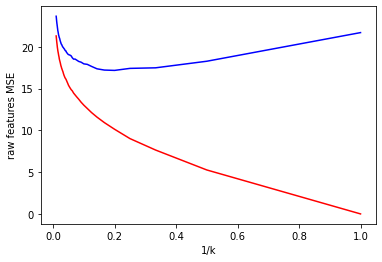

In [95]:
plt.plot(K,train_error,c='red')
plt.plot(K,test_error,c='blue')
plt.xlabel('1/k')
plt.ylabel('raw features MSE')
plt.show()

In [96]:
def get_key (dict, value):
    return [k for k, v in dict.items() if v == value]

In [97]:
min_test=min(test_error)
min_test

17.178110332288398

In [98]:
k_best=get_key(test_error_dic,min_test)
k_best
print('the best K is', k_best)

the best K is [5]


In [99]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [100]:
X=data.drop('PE',axis=1)
y=data['PE']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [102]:
from sklearn.preprocessing import MinMaxScaler
train2 = []
test2 = []
K2 = []
n2 = []
test_error_dic2={}
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_scaled = scaler.transform(X_train)
X2_scaled = scaler.transform(X_test)
for i in range (100):
    k=1+i
    m2 = KNeighborsRegressor(n_neighbors = k)
    m2.fit(X_scaled,y_train)
    pred_train2 = m2.predict(X_scaled)
    pred_test2 = m2.predict(X2_scaled)
    test_mse = mean_squared_error(y_test,pred_test2)
    train_mse = mean_squared_error(y_train,pred_train2)
    train2.append(train_mse)
    test2.append(test_mse)
    K2.append(1/k)
    n2.append(k)
    test_error_dic2[k]=test_mse

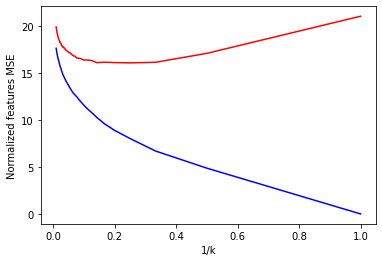

In [103]:
plt.plot(K2,test2, color = 'red')
plt.plot(K2,train2,color = 'blue')
plt.xlabel('1/k')
plt.ylabel('Normalized features MSE')
plt.show()

In [104]:
min_test2=min(test2)
min_test2

16.086260656130275

In [105]:
k_best2=get_key(test_error_dic2,min_test2)
k_best2
print('the best K is', k_best2)

the best K is [4]


# Question J

In [106]:
# KNN test error is 17.178 and 16.086 after normalized. The test error in MSL is 20.147. So the KNN is better.

# Question ISLR: 2.4.1

In [107]:
# a) The flexible method is better. It will fit the data closer 
# and with the large sample size, would perform better than an inflexible approach.

In [108]:
# b) The inflexible method is better. Because the flexible method would overfit the small number of observations.

In [109]:
# c) The flexible model is better. The linear model must not provide an accurate estimation for the data set.

In [110]:
# d) the inflexible method is better. the large error will influence the flexible method.

# Question ISLR: 2.4.7

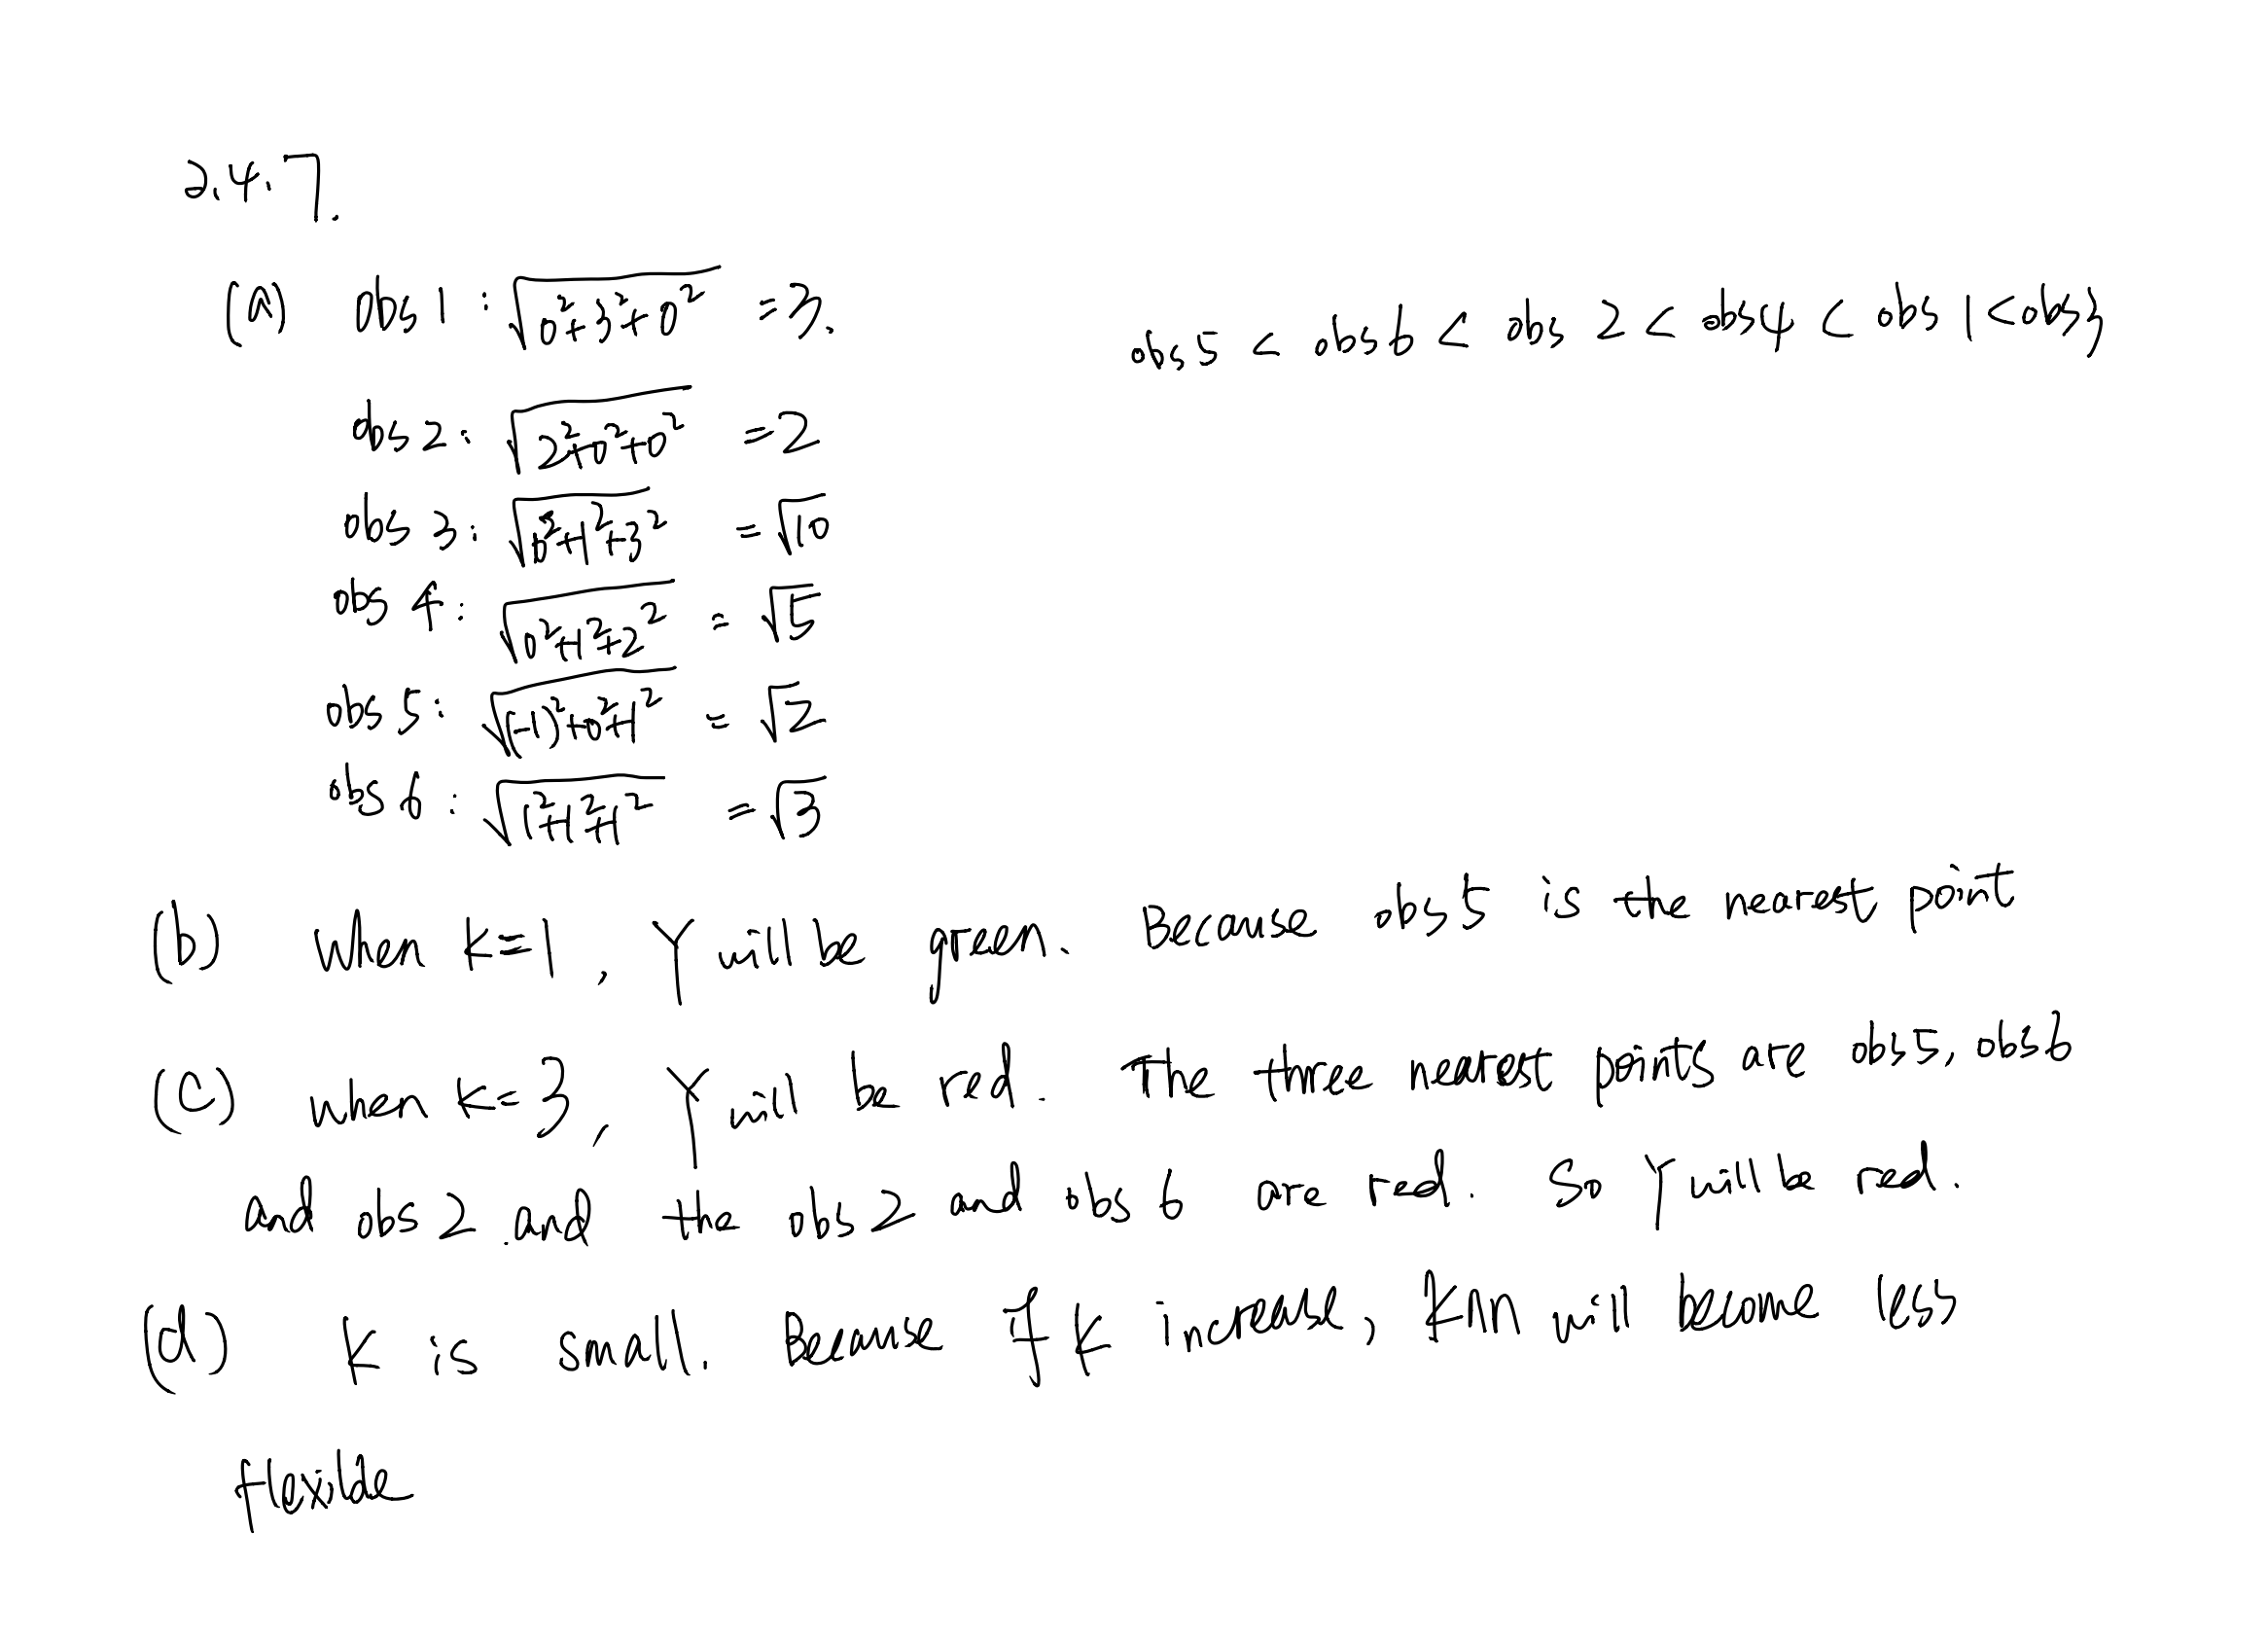